In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
2116,sgd,57.225,59.225,40.4846,2,261.0018,13,0.11233,0.95312
2117,rmsprop,55.925,40.575,31.8268,2,130.5009,16,0.07947,0.95833
2118,adadelta,51.250,62.075,35.4096,2,391.5027,11,0.62000,0.64062
2119,adagrad,53.950,54.275,36.0557,2,304.5021,12,0.33067,0.77083


In [3]:
df.optimizer.value_counts()

adagrad     266
adam        266
adamax      265
ftrl        265
nadam       265
sgd         265
rmsprop     265
adadelta    264
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    2121 non-null   object 
 1   cpu          2121 non-null   float64
 2   memory       2121 non-null   float64
 3   time         2121 non-null   float64
 4   epochs       2121 non-null   int64  
 5   predictions  2121 non-null   float64
 6   dataset      2121 non-null   int64  
 7   loss         2121 non-null   float64
 8   accuracy     2121 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 149.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,2121.000000,2121.000000,2121.000000,2121.0,2121.000000,2121.000000,2121.000000,2121.000000
mean,56.210514,52.265017,34.702572,2.0,240.615531,14.444602,0.235093,0.884187
std,6.696207,15.688804,5.030588,0.0,123.190293,2.728064,0.237126,0.158287
min,30.725000,16.675000,23.651400,2.0,43.500300,1.000000,0.004010,0.223960
25%,52.050000,43.975000,30.839700,2.0,130.500900,15.000000,0.083880,0.885420
50%,57.250000,51.900000,34.866100,2.0,217.501500,15.000000,0.130800,0.947920
75%,61.975000,59.450000,38.040500,2.0,348.002400,16.000000,0.284860,0.973960
max,81.400000,81.575000,56.897100,2.0,435.003100,16.000000,1.235300,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


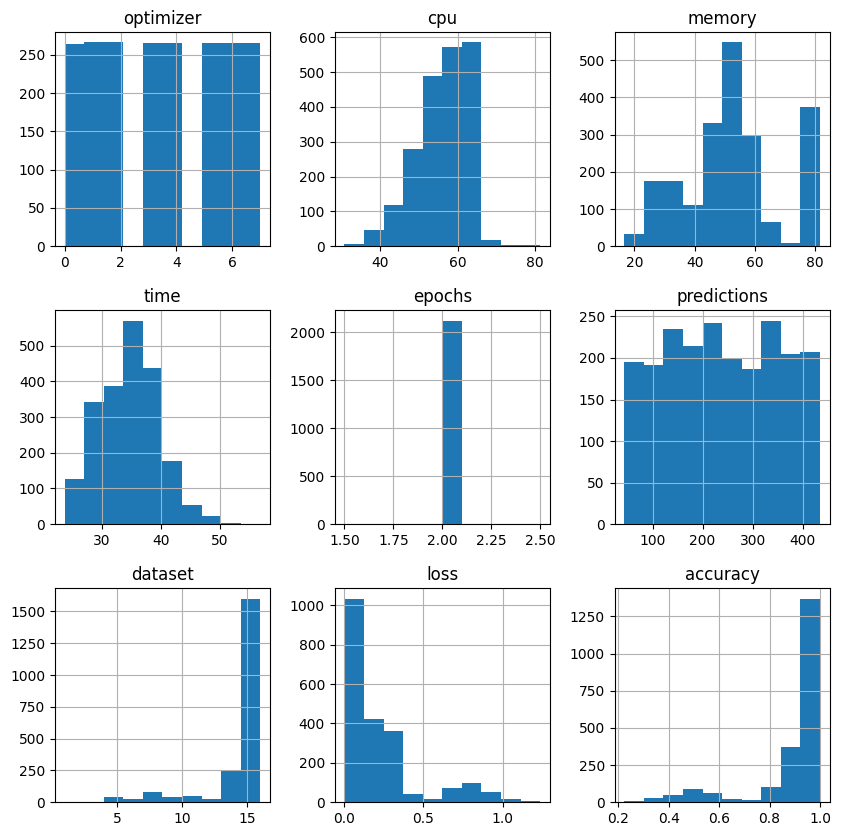

In [9]:
plot = df.hist(figsize=(10,10))

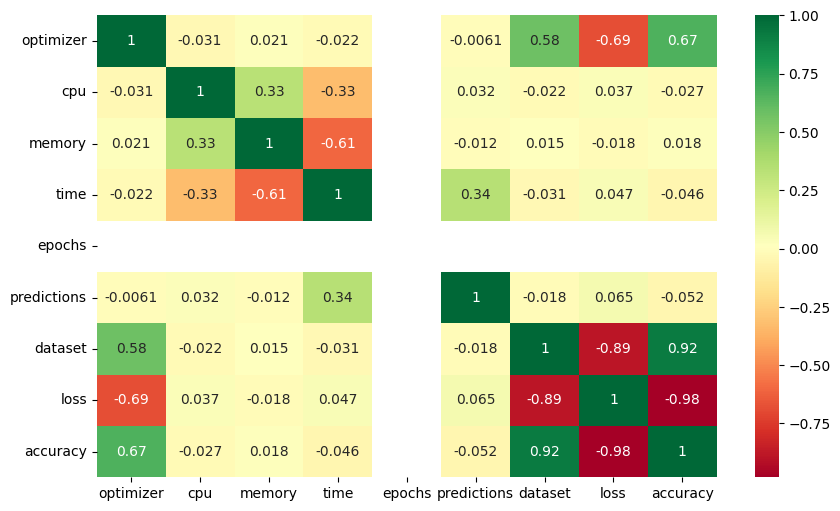

In [10]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [25]:
X = df[['dataset','loss','accuracy']]
y = df['optimizer']

In [26]:
X.head()

,dataset,loss,accuracy
0,15,0.29111,0.86458
1,16,0.06496,0.98438
2,15,0.07996,0.97396
3,15,0.30984,0.86979
4,15,0.11819,0.95312


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [101]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.640
Test set score: 0.544
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.70      0.78      0.74        65
           2       0.31      0.33      0.32        66
           3       0.56      0.66      0.60        59
           4       0.81      0.77      0.79        79
           5       0.26      0.25      0.25        61
           6       0.58      0.23      0.33        77
           7       0.20      0.31      0.25        58

    accuracy                           0.54       531
   macro avg       0.55      0.54      0.54       531
weighted avg       0.57      0.54      0.54       531



In [31]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.537
2,accuracy,0.323
0,dataset,0.140


In [50]:
xg = XGBClassifier(n_estimators=8)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.681
Test set score: 0.552
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.62      0.77      0.69        65
           2       0.39      0.38      0.38        66
           3       0.62      0.68      0.65        59
           4       0.78      0.67      0.72        79
           5       0.26      0.34      0.30        61
           6       0.60      0.27      0.37        77
           7       0.24      0.31      0.27        58

    accuracy                           0.55       531
   macro avg       0.57      0.55      0.55       531
weighted avg       0.58      0.55      0.55       531



In [33]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
2,accuracy,0.551
1,loss,0.333
0,dataset,0.117


In [114]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=1.5)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.523
Test set score: 0.501
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.71      0.77      0.74        65
           2       0.21      0.12      0.15        66
           3       0.45      0.68      0.54        59
           4       0.76      0.77      0.77        79
           5       0.22      0.48      0.30        61
           6       0.50      0.03      0.05        77
           7       0.21      0.19      0.20        58

    accuracy                           0.50       531
   macro avg       0.51      0.50      0.47       531
weighted avg       0.52      0.50      0.47       531



Neural Networks

In [154]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded)

In [224]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [225]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping], validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/100
50/50 [==============================] - 4s 16ms/step - loss: 1.7642 - accuracy: 0.3642 - val_loss: 2.0973 - val_accuracy: 0.2034
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 1.4101 - accuracy: 0.4403 - val_loss: 2.1345 - val_accuracy: 0.1337
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 1.3582 - accuracy: 0.4377 - val_loss: 2.1013 - val_accuracy: 0.1337
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 1.3056 - accuracy: 0.4610 - val_loss: 2.0753 - val_accuracy: 0.1337
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 1.2411 - accuracy: 0.4667 - val_loss: 1.9521 - val_accuracy: 0.1375
Epoch 6/100
50/50 [==============================] - 0s 10ms/step - loss: 1.2491 - accuracy: 0.4585 - val_loss: 1.8948 - val_accuracy: 0.2166
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 1.2144 - accuracy: 0.4579 - val_loss: 1.5962 - val_accuracy: 0.3371
Epoch 8/10

Minimum validation loss: 1.0232058763504028


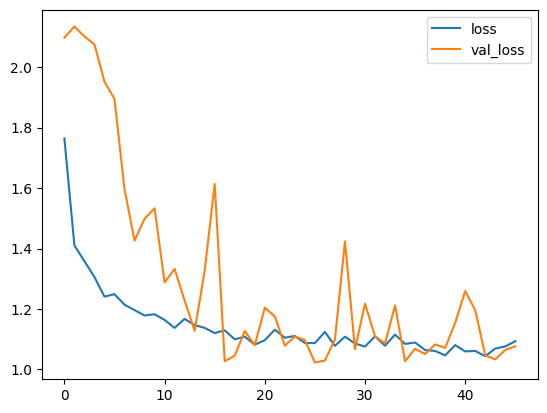

In [226]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.5574387907981873


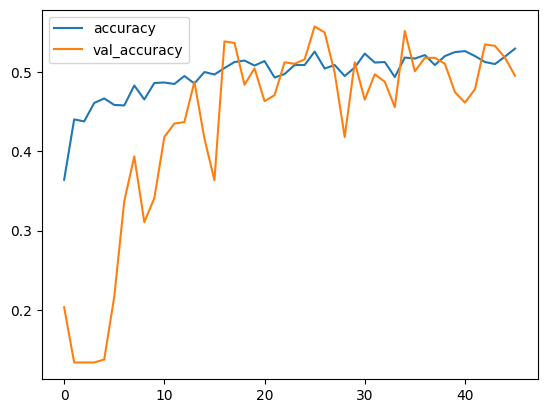

In [227]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {}".format(history_df['val_accuracy'].max()))